In [10]:
from google.colab import files
uploaded = files.upload()

Saving Judgment_Embeddings_InLegalBERT.xlsx to Judgment_Embeddings_InLegalBERT (1).xlsx


Epochs needed for convergence with step activation: 130


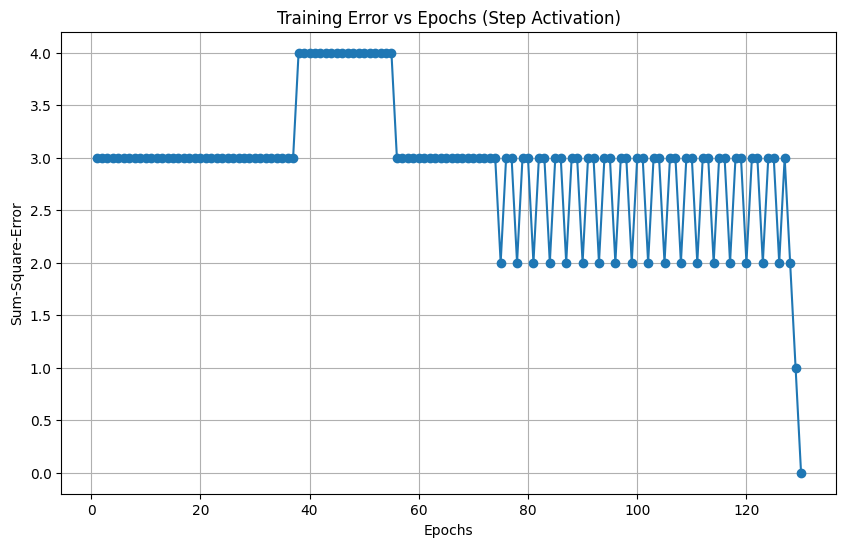

Epochs needed with step activation: 130
Epochs needed with bipolar_step activation: 1000
Epochs needed with sigmoid activation: 1000
Epochs needed with relu activation: 390
Learning rate 0.1 - Epochs needed: 68
Learning rate 0.2 - Epochs needed: 37
Learning rate 0.3 - Epochs needed: 23
Learning rate 0.4 - Epochs needed: 23
Learning rate 0.5 - Epochs needed: 20
Learning rate 0.6 - Epochs needed: 19
Learning rate 0.7 - Epochs needed: 15
Learning rate 0.8 - Epochs needed: 14
Learning rate 0.9 - Epochs needed: 13
Learning rate 1.0 - Epochs needed: 14


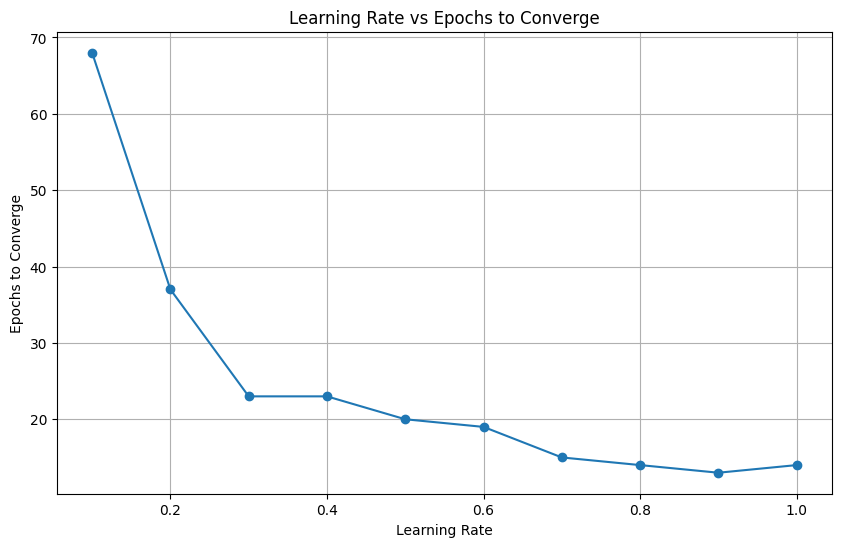

XOR Gate Results (Single-Layer Perceptron)
Activation: step         | Epochs: 1000 | Final Error: 4.0000
Activation: bipolar_step | Epochs: 1000 | Final Error: 6.0000
Activation: sigmoid      | Epochs: 1000 | Final Error: 1.0255
Activation: relu         | Epochs: 1000 | Final Error: 1.1080


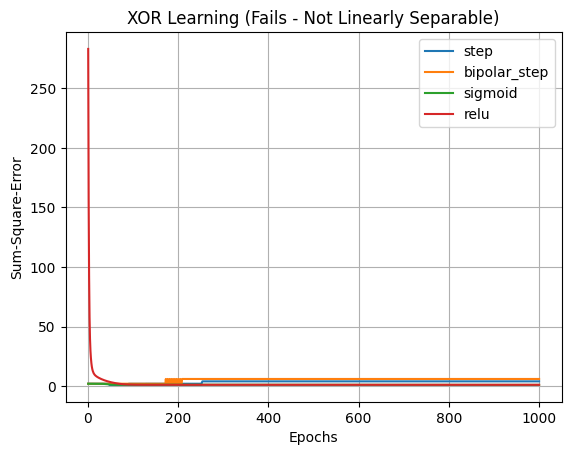


Customer classification converged in 16 epochs
Predictions: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Actual:      [1 1 1 0 1 0 1 1 0 0]
Accuracy:    1.0

Pseudo-inverse results:
Pseudo-inverse weights: [ 0.1139903  -0.02342675  0.2607237   0.03727212]
Predictions: [1 1 1 0 1 0 1 1 0 0]
Actual:     [1 1 1 0 1 0 1 1 0 0]
Accuracy:   1.0

Comparison Summary
Method			Accuracy	Weights
Perceptron		1.0000	[-3.03101689e-03 -1.25328474e+00  8.81124171e+00 -4.63422567e-01]
Pseudo-Inverse		1.0000	[ 0.1139903  -0.02342675  0.2607237   0.03727212]

Neural network converged in 1000 epochs
Results (XOR Gate with Step Activation)
Initial weights: [10.    0.2  -0.75]
Final weights:   [ 0.1 -0.1 -0.1]
Epochs needed:   1000 (of max 1000)
Final error:     4.0000 (Target ≤ 0.002)

Note: XOR is not linearly separable - single-layer perceptron cannot learn this pattern.


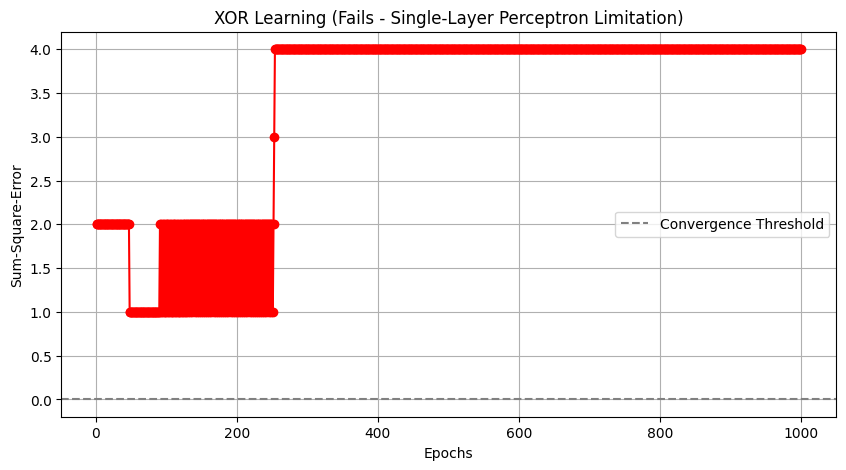


Two-output perceptron converged in 1000 epochs

MLPClassifier for AND gate:
Training set accuracy: 0.75

MLPClassifier for XOR gate:
Training set accuracy: 0.5


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#A1:Basic Function Modules
def summation_unit(inputs, weights):
    return np.dot(inputs, weights[1:]) + weights[0]  # weights[0] is bias

def activation_unit(y, activation_type='step'):
    if activation_type == 'step':
        return 1 if y > 0 else 0
    elif activation_type == 'bipolar_step':
        return 1 if y > 0 else (-1 if y < 0 else 0)
    elif activation_type == 'sigmoid':
        return 1 / (1 + np.exp(-y))
    elif activation_type == 'tanh':
        return np.tanh(y)
    elif activation_type == 'relu':
        return max(0, y)
    elif activation_type == 'leaky_relu':
        return max(0.01*y, y)
    else:
        raise ValueError("Invalid activation type")

def comparator_unit(actual, predicted):
    return actual - predicted

#A2:Perceptron Implementation for AND Gate
def train_perceptron(X, y, weights, learning_rate=0.05, activation='step', max_epochs=1000, convergence_error=0.002):
    epoch_errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            # Forward pass
            summation = summation_unit(xi, weights)
            output = activation_unit(summation, activation)
            # Error calculation
            error = comparator_unit(target, output)
            total_error += error ** 2
            # Weight updates
            weights[0] += learning_rate * error  # bias update
            for i in range(len(xi)):
                weights[i+1] += learning_rate * error * xi[i]
        epoch_errors.append(total_error)

        # Check for convergence
        if total_error <= convergence_error:
            break

    return weights, epoch_errors, epoch + 1

# AND Gate data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Initial weights as given
initial_weights = np.array([10, 0.2, -0.75])

# Train with step activation
trained_weights, errors, epochs_needed = train_perceptron(X_and, y_and, initial_weights.copy())

print(f"Epochs needed for convergence with step activation: {epochs_needed}")

# Plot epochs vs error
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors)+1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Training Error vs Epochs (Step Activation)')
plt.grid(True)
plt.show()

#A3:Different Activation Functions
activation_functions = ['step', 'bipolar_step', 'sigmoid', 'relu']
epochs_results = {}

for activation in activation_functions:
    _, _, epochs = train_perceptron(X_and, y_and, initial_weights.copy(), activation=activation)
    epochs_results[activation] = epochs
    print(f"Epochs needed with {activation} activation: {epochs}")

#A4: Varying Learning Rates
learning_rates = np.arange(0.1, 1.1, 0.1)
epochs_vs_lr = []
for lr in learning_rates:
    _, _, epochs = train_perceptron(X_and, y_and, initial_weights.copy(), learning_rate=lr)
    epochs_vs_lr.append(epochs)
    print(f"Learning rate {lr:.1f} - Epochs needed: {epochs}")
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_vs_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.title('Learning Rate vs Epochs to Converge')
plt.grid(True)
plt.show()

#A5:XOR Gate Implementation
# XOR Gate Data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR labels

# Initial weights
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Activation functions to test (A3 requirements)
activation_functions = ['step', 'bipolar_step', 'sigmoid', 'relu']

def train_perceptron(X, y, weights, activation='step', max_epochs=1000, convergence_error=0.002):
    epoch_errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            # Forward pass
            summation = np.dot(xi, weights[1:]) + weights[0]
            if activation == 'step':
                output = 1 if summation > 0 else 0
            elif activation == 'bipolar_step':
                output = 1 if summation > 0 else (-1 if summation < 0 else 0)
            elif activation == 'sigmoid':
                output = 1 / (1 + np.exp(-summation))
            elif activation == 'relu':
                output = max(0, summation)

            # Error and weight update
            error = target - output
            total_error += error ** 2
            weights[0] += learning_rate * error  # Bias update
            weights[1:] += learning_rate * error * xi

        epoch_errors.append(total_error)
        if total_error <= convergence_error:
            break
    return weights, epoch_errors, epoch + 1

# Run experiments for XOR
print("XOR Gate Results (Single-Layer Perceptron)")
for activation in activation_functions:
    _, errors, epochs = train_perceptron(X_xor, y_xor, initial_weights.copy(), activation=activation)
    print(f"Activation: {activation:12s} | Epochs: {epochs:4d} | Final Error: {errors[-1]:.4f}")
    plt.plot(range(1, len(errors)+1), errors, label=activation)

plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('XOR Learning (Fails - Not Linearly Separable)')
plt.legend()
plt.grid(True)
plt.show()

#A6:Customer Data Classification
# Customer data
X_customer = np.array([
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4]
])
y_customer = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # 1=Yes, 0=No

def summation_unit(inputs, weights):
    return np.dot(inputs, weights[1:]) + weights[0]

def activation_unit(y, activation_type='sigmoid'):
    if activation_type == 'sigmoid':
        return 1 / (1 + np.exp(-y))
    elif activation_type == 'step':
        return 1 if y > 0 else 0

def train_perceptron(X, y, weights, activation='sigmoid', learning_rate=0.1, max_epochs=1000, convergence_error=0.002):
    epoch_errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            # Forward pass
            summation = summation_unit(xi, weights)
            output = activation_unit(summation, activation)

            # Error calculation
            error = target - output
            total_error += error ** 2

            # Weight updates
            weights[0] += learning_rate * error  # bias update
            for i in range(len(xi)):
                weights[i+1] += learning_rate * error * xi[i]

        epoch_errors.append(total_error)
        if total_error <= convergence_error:
            break

    return weights, epoch_errors, epoch + 1

# Initialize weights randomly (3 features + 1 bias)
customer_weights = np.random.rand(4)

# Train with sigmoid activation and learning rate=0.1
trained_weights, errors, epochs = train_perceptron(
    X_customer,
    y_customer,
    customer_weights,
    activation='sigmoid',
    learning_rate=0.1
)

print(f"\nCustomer classification converged in {epochs} epochs")

# Make predictions
predictions = []
for xi in X_customer:
    summation = summation_unit(xi, trained_weights)
    output = activation_unit(summation, 'sigmoid')
    predictions.append(1 if output > 0.5 else 0)

print("Predictions:", predictions)
print("Actual:     ", y_customer)
print("Accuracy:   ", np.mean(predictions == y_customer))

#A7:Comparison with Pseudo-Inverse
# Adding bias term to X
X_with_bias = np.c_[np.ones(X_customer.shape[0]), X_customer]
# Pseudo-inverse solution
pseudo_weights = np.linalg.pinv(X_with_bias) @ y_customer
# Predict with pseudo-inverse
pseudo_predictions = (X_with_bias @ pseudo_weights > 0.5).astype(int)

print("\nPseudo-inverse results:")
print("Pseudo-inverse weights:", pseudo_weights)
print("Predictions:", pseudo_predictions)
print("Actual:    ", y_customer)
print("Accuracy:  ", np.mean(pseudo_predictions == y_customer))

# After running both perceptron and pseudo-inverse:
print("\nComparison Summary")
print("Method\t\t\tAccuracy\tWeights")
print(f"Perceptron\t\t{np.mean(predictions == y_customer):.4f}\t{trained_weights}")
print(f"Pseudo-Inverse\t\t{np.mean(pseudo_predictions == y_customer):.4f}\t{pseudo_weights}")

#A8:Neural Network with Backpropagation for AND Gate
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def train_neural_network(X, y, hidden_units=2, learning_rate=0.05, max_epochs=1000, convergence_error=0.002):
    # Initialize weights randomly
    input_size = X.shape[1]
    input_hidden_weights = np.random.rand(input_size, hidden_units) * 0.1 - 0.05
    hidden_output_weights = np.random.rand(hidden_units) * 0.1 - 0.05
    hidden_bias = np.random.rand(hidden_units) * 0.1 - 0.05
    output_bias = np.random.rand() * 0.1 - 0.05

    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0

        for xi, target in zip(X, y):
            # Forward pass
            hidden_layer_input = np.dot(xi, input_hidden_weights) + hidden_bias
            hidden_layer_output = sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, hidden_output_weights) + output_bias
            predicted_output = sigmoid(output_layer_input)

            # Error calculation
            error = target - predicted_output
            total_error += error ** 2

            # Backward pass
            # Output layer
            d_output = error * sigmoid_derivative(predicted_output)

            # Hidden layer
            d_hidden = d_output * hidden_output_weights * sigmoid_derivative(hidden_layer_output)

            # Update weights
            hidden_output_weights += learning_rate * d_output * hidden_layer_output
            output_bias += learning_rate * d_output

            input_hidden_weights += learning_rate * np.outer(xi, d_hidden)
            hidden_bias += learning_rate * d_hidden

        epoch_errors.append(total_error)

        if total_error <= convergence_error:
            break

    return input_hidden_weights, hidden_output_weights, epoch_errors, epoch + 1

# Train neural network for AND gate
input_hidden_weights, hidden_output_weights, nn_errors, nn_epochs = train_neural_network(X_and, y_and)

print(f"\nNeural network converged in {nn_epochs} epochs")

#A9:XOR with Backpropagation
# XOR Gate Data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR labels

# Initial weights and parameters
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05
activation = 'step'   # Step activation

def train_perceptron(X, y, weights, activation='step', max_epochs=1000, convergence_error=0.002):
    epoch_errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            # Forward pass
            summation = np.dot(xi, weights[1:]) + weights[0]
            output = 1 if summation > 0 else 0  # Step activation

            # Error calculation
            error = target - output
            total_error += error ** 2

            # Weight updates
            weights[0] += learning_rate * error  # Bias update
            weights[1:] += learning_rate * error * xi

        epoch_errors.append(total_error)
        if total_error <= convergence_error:
            break

    return weights, epoch_errors, epoch + 1

# Train on XOR
trained_weights, errors, epochs_needed = train_perceptron(
    X_xor, y_xor, initial_weights.copy(), activation=activation
)

# Results
print(f"Results (XOR Gate with Step Activation)")
print(f"Initial weights: {initial_weights}")
print(f"Final weights:   {trained_weights}")
print(f"Epochs needed:   {epochs_needed} (of max 1000)")
print(f"Final error:     {errors[-1]:.4f} (Target ≤ {0.002})")
print("\nNote: XOR is not linearly separable - single-layer perceptron cannot learn this pattern.")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(errors)+1), errors, marker='o', color='red')
plt.axhline(y=0.002, color='gray', linestyle='--', label='Convergence Threshold')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('XOR Learning (Fails - Single-Layer Perceptron Limitation)')
plt.legend()
plt.grid(True)
plt.show()

#A10:Two Output Nodes Implementation
def train_perceptron_two_output(X, y, weights, learning_rate=0.05, max_epochs=1000, convergence_error=0.002):
    """
    Perceptron with two output nodes
    Maps 0 to [1, 0] and 1 to [0, 1]
    """
    # Initialize weights for two outputs
    if weights.shape != (3, 2):  # 2 bias + 2 input weights for each output
        weights = np.random.rand(3, 2) * 0.1 - 0.05

    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0

        for xi, target in zip(X, y):
            # Convert target to two outputs
            target_vec = np.array([1, 0]) if target == 0 else np.array([0, 1])

            # Forward pass for both outputs
            summation1 = summation_unit(xi, weights[:, 0])
            output1 = activation_unit(summation1, 'sigmoid')

            summation2 = summation_unit(xi, weights[:, 1])
            output2 = activation_unit(summation2, 'sigmoid')

            predicted_vec = np.array([output1, output2])

            # Error calculation
            error = target_vec - predicted_vec
            total_error += np.sum(error ** 2)

            # Weight updates for both outputs
            for i in range(2):
                weights[0, i] += learning_rate * error[i]  # bias update
                for j in range(len(xi)):
                    weights[j+1, i] += learning_rate * error[i] * xi[j]

        epoch_errors.append(total_error)

        if total_error <= convergence_error:
            break

    return weights, epoch_errors, epoch + 1

# Train two-output perceptron for AND gate
two_output_weights, two_output_errors, two_output_epochs = train_perceptron_two_output(X_and, y_and, np.random.rand(3, 2))

print(f"\nTwo-output perceptron converged in {two_output_epochs} epochs")

# A11: MLPClassifier for AND and XOR
# AND gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd',
                       learning_rate_init=0.05, max_iter=1000, tol=0.002)
mlp_and.fit(X_and, y_and)
print("\nMLPClassifier for AND gate:")
print("Training set accuracy:", mlp_and.score(X_and, y_and))

# XOR gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd',
                       learning_rate_init=0.05, max_iter=1000, tol=0.002)
mlp_xor.fit(X_xor, y_xor)
print("\nMLPClassifier for XOR gate:")
print("Training set accuracy:", mlp_xor.score(X_xor, y_xor))

In [18]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_name = "Judgment_Embeddings_InLegalBERT.xlsx"
df = pd.read_excel(file_name)

# Split features and target
X = df.drop(columns=["Label"]).values
y = df["Label"].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # Single hidden layer with 100 neurons
    activation='relu',          # ReLU activation
    solver='adam',              # Optimizer
    max_iter=1000,              # Maximum iterations
    random_state=42,
    learning_rate_init=0.001    # Learning rate
)

mlp.fit(X_train, y_train)

# Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nMLPClassifier Results")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


MLPClassifier Results
Train Accuracy: 0.9988
Test Accuracy: 0.6594

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1088
           1       1.00      1.00      1.00       495
           2       1.00      1.00      1.00       297
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00       108
           5       1.00      1.00      1.00        84
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        56
           9       1.00      1.00      1.00       175
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        11

    accuracy                           1.00      2583
   macro avg       1.00      1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_